# Introduction to Quantum Computing

<!-- Qubits, dirac notation, measurements, bloch sphere, quantum circuits -->

In classical computation, states (bits) are either 0 or 1, but quantum mechanics allows superposition of states, so a quantum state can be simultaneously 0 and 1. Such a superposition allows quantum computers to make calculations on more than one state at the same time. That's what makes possible the design of algorithms with exponentially speed-up such as Shor's Algorithm, which reduces to polynomial time, a task that runs in exponential time on classical computers.

A quantum state in superposition can be measured, but once we do that, it collapses to one of its states with a given probability. That's what makes the design of quantum algorithms harder than classical ones because we have to draw a system that collapses to what we want with a high probability.

This section seeks to introduce just the basic foundations of quantum computing as a background for the following sections. No prerequisite in quantum physics/mechanics is required. We'll present everything from the mathematical point of view, demanding just some prior knowledge in Linear Algebra and Complex Numbers.

## Quantum States and Dirac Notation

We represent a $n$-qubit quantum state as a normalized vector in $\mathbb{C}^{2^n}$ (that's it!). Take for example, the single-qubit states $a,b\in \mathbb{C}^2$ such that $a=\left(\begin{matrix}a_1\\ a_2\end{matrix}\right)$ and $b=\left(\begin{matrix}b_1\\ b_2\end{matrix}\right)$ with $a_1,a_2,b_1,b_2\in\mathbb{C}$. The so called Dirac notation is a shortcut for representing states and operations between them.

- **ket:** $\vert a\rangle = \left(\begin{matrix}a_1\\ a_2\end{matrix}\right)$

The most used notation around this text, it's the way we represent a quantum state.

- **bra:** $\langle b \vert = \vert b \rangle^\dagger=\left(\begin{matrix}b_1\\ b_2\end{matrix}\right)^\dagger=\left(\begin{matrix}\overline{b_1}& \overline b_2\end{matrix}\right)$

The bra is the conjugate transpose of a state (dagger notation $\dagger$). $\overline b_1$ means the complex conjugate of $b_1$.

- **bra-ket:** $\langle b \vert a\rangle=a_1\overline b_1+a_2\overline b_2$

A "inner product" between states. Observe that $\langle b \vert a\rangle = \overline {\langle a\vert b \rangle}$. We say $a$ and $b$ are **orthogonal states** if $\langle a\vert b\rangle = 0$.

Not every complex vector can represent quantum states, because they need to be normalized, i.e, all states $\vert\psi\rangle$ must satisfy $\langle\psi\vert\psi\rangle=1$. 

We define states $\vert0\rangle := \left(\begin{matrix}1\\0\end{matrix}\right)$ and $\vert1\rangle:=\left(\begin{matrix}0\\1\end{matrix}\right)$. It's easy to see that $\langle0\vert1\rangle=0$, so $\vert0\rangle$ and $\vert1\rangle$ are orthogonal.

The general single-qubit state is then:

$$\vert\psi\rangle = \alpha_0\vert0\rangle+\alpha_1\vert1\rangle,$$

with $\alpha_0,\alpha_1\in\mathbb{C}$ and $|\alpha_0|^2+|\alpha_1|^2=1$

We also define the tensor product of two states as:

$$\vert a\rangle\otimes\vert b\rangle = \left(\begin{matrix}a_1b_1\\a_1b_2\\a_2b_1\\a_2b_2\end{matrix}\right)$$

This operation generalizes what we're doing in $\mathbb{C}^2$ to $\mathbb{C}^{2^n}$. We defines the **n-qubit computational basis** as the set of all $2^n$ possible tensor products of $\vert0\rangle$ and $\vert1\rangle$. We can also represent tensor product with the notation $\vert x_1x_2\ldots x_n\rangle:=x_1\otimes x_2\otimes\ldots\otimes x_n$, that's why a $n$-qubit state vector have $2^n$ entries. The 2-qubit computational basis, will be, for example

\begin{align*}\vert00\rangle &= \left(\begin{matrix}1\cdot1\\1\cdot0\\0\cdot1\\0\cdot0\end{matrix}\right)=\left(\begin{matrix}1\\0\\0\\0\end{matrix}\right)\\
\vert01\rangle &= \left(\begin{matrix}1\cdot0\\1\cdot1\\0\cdot0\\0\cdot1\end{matrix}\right)=\left(\begin{matrix}0\\1\\0\\0\end{matrix}\right)\\
\vert10\rangle &= \left(\begin{matrix}0\cdot1\\0\cdot0\\1\cdot1\\1\cdot0\end{matrix}\right)=\left(\begin{matrix}0\\0\\1\\0\end{matrix}\right)\\
\vert11\rangle &= \left(\begin{matrix}0\cdot0\\0\cdot1\\1\cdot0\\1\cdot1\end{matrix}\right)=\left(\begin{matrix}0\\0\\0\\1\end{matrix}\right)\end{align*}

Notice the relation between binary form in the final vector, and that this basis is pairwise orthogonal. A general 2-qubit state can then be written in the computational basis as:

$$\vert\psi\rangle = \alpha_0\vert00\rangle+\alpha_1\vert01\rangle+\alpha_2\vert10\rangle+\alpha_3\vert11\rangle$$

State $\vert\psi\rangle$ is said to be in **superposition** of the states $\vert00\rangle,\vert01\rangle,\vert10\rangle$ and $\vert11\rangle$. 

## Measurements and Born Rule

Measuring a state in superposition is the way we can extract and read information about the quantum system. Quantum measurement collapses the state to one of the vectors of its orthogonal basis, with a given probability.

From now on, consider $N=2^n$.

We can do a projective measure of n-qubit state $\displaystyle\vert\psi\rangle=\sum_{x=0}^{N-1}\alpha_x\vert x\rangle$ onto the orthogonal base $\{\vert 0\rangle,\vert 1\rangle,\ldots\vert N-1\rangle\}$. Here, we are commiting an abuse of notation using $\vert x\rangle$ (x in base 10) to represent the state $\vert00\ldots1\ldots0\rangle$, with the $(x+1)^{th}$ entriy being equal 1, and the rest zero.

After this procedure, the state will colapse to either one of the $N$ states from the basis, with probability of $|\langle x\vert\psi\rangle|^2$ of collapsing to $x$. Thats's the so called **Born Rule:**

$$\mathbb{P}(x)=|\langle x\vert\psi\rangle|^2$$

In the case of $\vert\psi\rangle$ written in computational basis, $\mathbb{P}(x)=|\alpha_x|^2$. Notice that, since $\vert\psi\rangle$ must be normalized, we'll have $\displaystyle\sum_{x=0}^{N-1}\mathbb{P}(x) = \sum_{x=0}^{N-1}|\alpha_x|^2=1$, as expected.

## The Bloch Sphere

We can write a single-qubit pure state as $\vert\psi\rangle=\cos\frac \theta 2\vert0\rangle+e^{\varphi i}\sin\frac\theta2\vert1\rangle$ where $\phi$ is the relative phase of the state, and $\theta$ describes the probability of measuring basis states, such that $\mathbb{P}(\vert0\rangle)=\cos^2\frac\theta2$ and $\mathbb{P}(\vert1\rangle)=\sin^2\frac\theta2$.

All these states can be represented geometrically in the Bloch Sphere, an origin centered unitaty radius sphere, with maps the above state $\vert\psi\rangle$ to the 3D point:

$$\vec r = \left(\begin{matrix}\sin\theta\cos\varphi\\\sin\theta\sin\varphi\\\cos\theta\end{matrix}\right)$$

The image below [(ResearchGate)](https://www.researchgate.net/figure/color-online-Bloch-sphere-representation-of-the-Bloch-vector-v-for-qubits-d-2_fig3_316828699), shows the angle scheme and the axis poles states (read $v$ as $\vert\psi\rangle$).

We have saw before states $\vert0\rangle$ and $\vert1\rangle$, but didn't mentioned $\vert+\rangle,\vert-\rangle$ nor $\vert+i\rangle,\vert-i\rangle$. They are orthogonal pairs, with the formula shown in the image.

![](images/blochsphere.png)

Let's map these 6 states to its Blch Sphere point.

On Z-axis:

- $\vert0\rangle$: $\theta=0\Rightarrow \vec r = (\begin{matrix}0 &0 &1\end{matrix})^T$
- $\vert1\rangle$: $\theta=\pi\Rightarrow \vec r = (\begin{matrix}0 &0 &-1\end{matrix})^T$

On X-axis:

- $\vert+\rangle$: $\theta=\pi/2,\varphi=0\Rightarrow \vec r = \left(\begin{matrix}\sin\frac\pi2 \cos0\\\sin\frac\pi2\sin0 \\\cos\frac\pi2\end{matrix}\right)=\left(\begin{matrix}1 \\0 \\0\end{matrix}\right)$

- $\vert-\rangle$: $\theta=\pi/2,\varphi=\pi\Rightarrow \vec r = \left(\begin{matrix}\sin\frac\pi2 \cos\pi\\\sin\frac\pi2\sin\pi \\\cos\frac\pi2\end{matrix}\right)=\left(\begin{matrix}-1 \\0 \\0\end{matrix}\right)$

And analogously (we won't explicit the calculations) on the Y-axis:

- $\vert +i\rangle\Rightarrow \vec r=\left(\begin{matrix}0 \\1 \\0\end{matrix}\right)$
- $\vert -i\rangle\Rightarrow \vec r =\left(\begin{matrix}0 \\-1 \\0\end{matrix}\right)$

Such a geometric intuition will be important in [Quantum Fourier Transform](qft.md) section, specially of the states zero, one, plus and minus.

## Quantum Circuits

Quantum Circuit models are blocks that carry out elementary computational operations, the so called **gates**.

In quantum theory, a gate is a unitary operator, i.e, a matrix $U$ such that $U^\dagger U = I$. See some examples of single-qubit gates:

- **(Bit flip)** $\sigma_x=\left(\begin{matrix}0&1\\1&0\end{matrix}\right)$

One can easyly show that $\sigma_x\vert0\rangle = \vert1\rangle$ and $\sigma_x\vert1\rangle=\vert0\rangle$. In general, this gate performs a rotation around the x-axis by $pi$ radians.

- **(Phase flip)** $\sigma_z=\left(\begin{matrix}1&0\\ 0&-1\end{matrix}\right)$. 

It's easy to conclude that $\sigma_z\vert+\rangle = \vert-\rangle$ and $\sigma_z\vert-\rangle = \vert+\rangle$. In general, this gate does a $pi$-radians rotation around the z-axis.

- **(Hadamard gate)** The most importante gate of this text:

$$H=\dfrac{1}{\sqrt2}\left(\begin{matrix}1&0\\0&-1\end{matrix}\right)$$

With a rapid calculation we get:

\begin{align*}H\vert0\rangle&=\vert+\rangle=\dfrac{1}{\sqrt2}(\vert0\rangle+\vert1\rangle)\\
H\vert1\rangle&=\vert-\rangle=\dfrac{1}{\sqrt2}(\vert0\rangle-\vert1\rangle)\end{align*}

Notice that this gate created a superposition of states zero and one, with probability 1/2 of measuring each one! That's what makes this gate so important, and we'll use-it a lot in the next sections.

## Qiskit Introduction

[Qiskit](qiskit.org) is a Python library that makes it esier to design and test quantum circuits and algorithms. You can follow the website instrutions to install it on your computer. We are going to create a basic circuit that applies Hadamard gate on $\vert0\rangle$, take the measurements and collapses to state zero or one.

At first, let's import the required libraries:

In [20]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

Now lets build and display the circuit diagram:

In [23]:
qc = QuantumCircuit(1) # Creates a single-qubit quantum circuit
qc.initialize([1,0], 0)  # Define initial_state as |0>
qc.h(0) # Applid Hadamard Gate on 0th qubit (in this case, the only one)
qc.measure_all() # Adds measurement to all qubits
qc.draw()

┌─────────────────┐┌───┐ ░ ┌─┐
   q_0: ┤ Initialize(1,0) ├┤ H ├─░─┤M├
        └─────────────────┘└───┘ ░ └╥┘
meas: 1/════════════════════════════╩═
                                    0

We're going to run this circuit in a quantum simulator, which does not require acess to an actual quantum device:

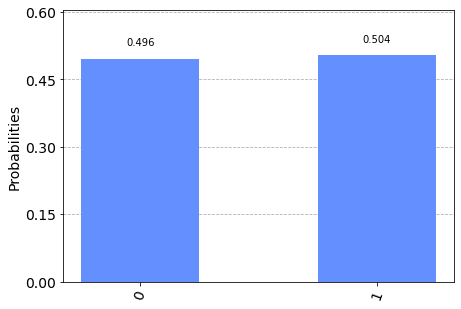

In [24]:
sim = Aer.get_backend('qasm_simulator')  # Defines the simulator
qobj = assemble(qc,shots=1000) # Run 1000 shots of the circuit
result = sim.run(qobj).result() #Collect results
counts = result.get_counts() # Count results for plotting
plot_histogram(counts)

As expected, around half of the measurements collapses to $\vert0\rangle$ and the other half to $\vert1\rangle$. The below table shows the library versions, if you want to reproduce the same environment used in this text.

In [25]:
import qiskit.tools.jupyter
%qiskit_version_table